# CLUSTER ANALYSIS

Cluster analysis is a primitive technique in that no assumptions are made regarding number of 
groups or group structure. Grouping is done on the basis of similarity or distances. The inputs 
required are similarity measures or data from which similarity can be computed. CLUSTER 
ANALYSIS IS AN UNSUPERVISED LEARNING TECHNIQUE WHICH AIMS AT GROUPING SET OF 
OBJECTS INTO CLUSTERS, SUCH THAT OBJECTS IN THE SAME CLUSTER SHOULD BE SIMILAR AS 
MUCH AS POSSIBLE WHERE AS OBJECTS IN ONE CLUSTER SHOULD BE DISSIMILAR AS MUCH AS 
POSSIBLE WITH THE OTHER CLUSTER.
Searching the data for a structure of natural grouping is an important exploratory technique. 
Grouping can provide information for assessing dimensionality, identifying outliers and suggests 
interesting hypothesis about relationships.

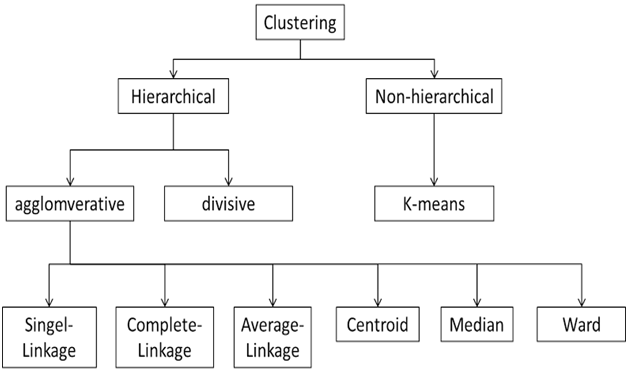

In [5]:
#Importing required libraries
import pandas as pd
import numpy as np
from pandas import plotting
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [6]:
# Reading dataset from csv file.
data=pd.read_csv('Mall_Customers.csv')
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [7]:
#Descriptive statistics of each variables in the dataset
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [8]:
#Checking for missing values
data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

Since we don't have any missing values in our dataset, we move to the next step. To understand our dataset in a better way, we use graphical methods. 

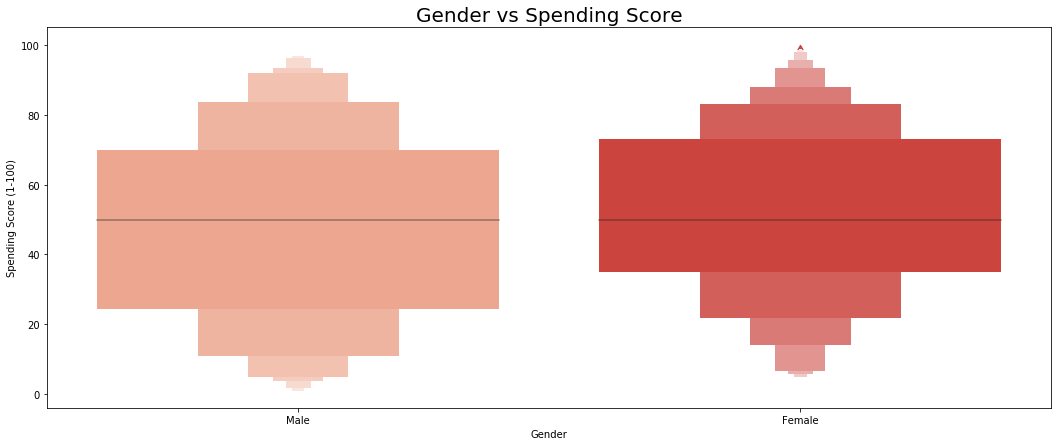

In [9]:
#Gender vs Spending Score
plt.rcParams['figure.figsize']=(18,7)
sns.boxenplot(data['Gender'], data['Spending Score (1-100)'], palette='Reds')
plt.title('Gender vs Spending Score', fontsize=20)
plt.show()

From the above graph we can observe that males have spending score around 25 to 70
and females have spending score around 35 to 75. From this we can say that females spends more than males.

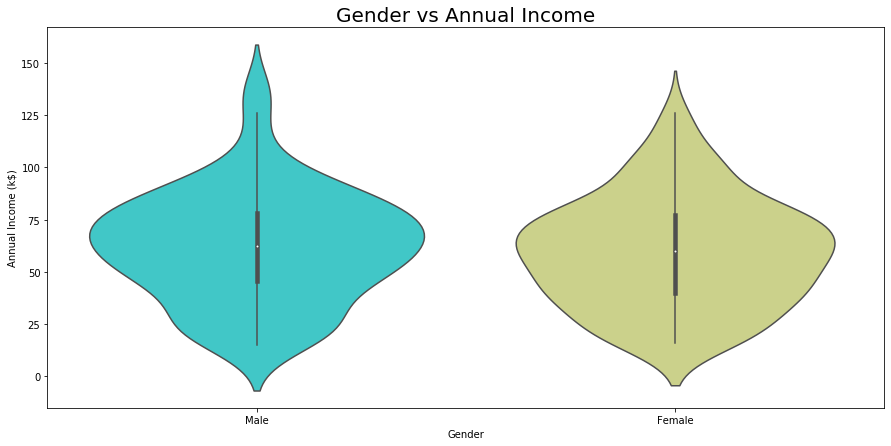

In [10]:
#Gender vs Annual income
plt.rcParams['figure.figsize']=(15,7)
sns.violinplot(data['Gender'], data['Annual Income (k$)'], palette='rainbow')
plt.title('Gender vs Annual Income', fontsize=20)
plt.show()

From the above graph we can observe that more number of males gets high annual income than females. But number of males and females are almost equal in number when it comes to getting low annual income.

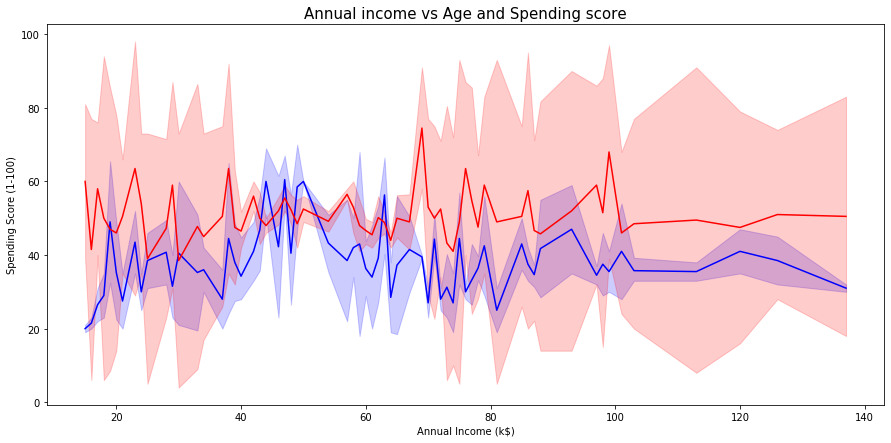

In [11]:
x=data['Annual Income (k$)']
y=data['Age']
z=data['Spending Score (1-100)']
sns.lineplot(x, y, color='blue')
sns.lineplot(x, z, color='red')
plt.title('Annual income vs Age and Spending score', fontsize=15)
plt.show()

In the above plot blue line represents annual income varies with age, and red line represents how annual income varies with spending score.

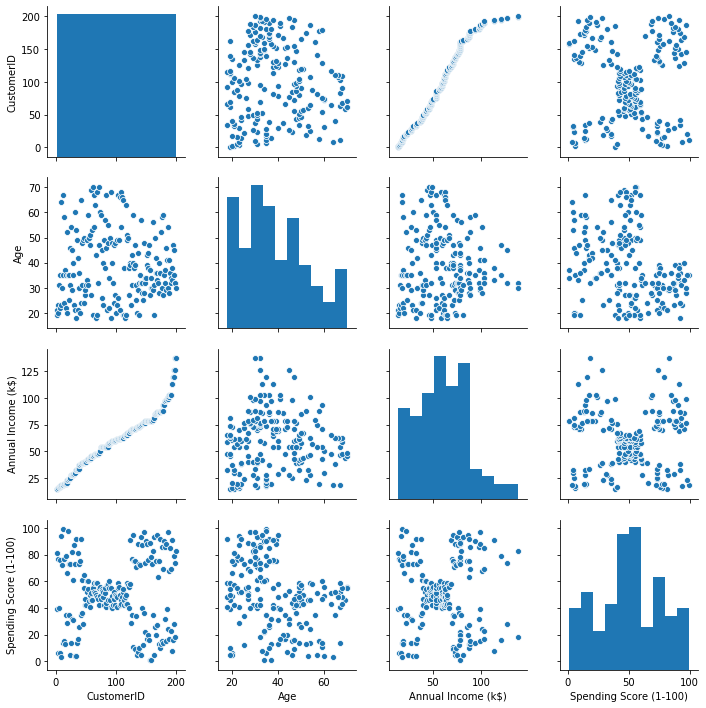

In [12]:
#Data visualization with pairplot
sns.pairplot(data)
plt.show()

From the above pairplot we can observe the relation between the variables. We can say that customers aged between 20-40 spends more. And Annual Income and spending score looks like a good pair. So we use this pair for further analysis.

In [9]:
#Feature selection
DATA=data.iloc[:, [ 3,4]].values
DATA.shape

(200, 2)

For our analysis we are using cluster analysis. For that finding number of optimum clusters is very important. By using scatter plot, dendrogram and elbow methods we can find optimum number of clusters.
First we plot scatter plot.

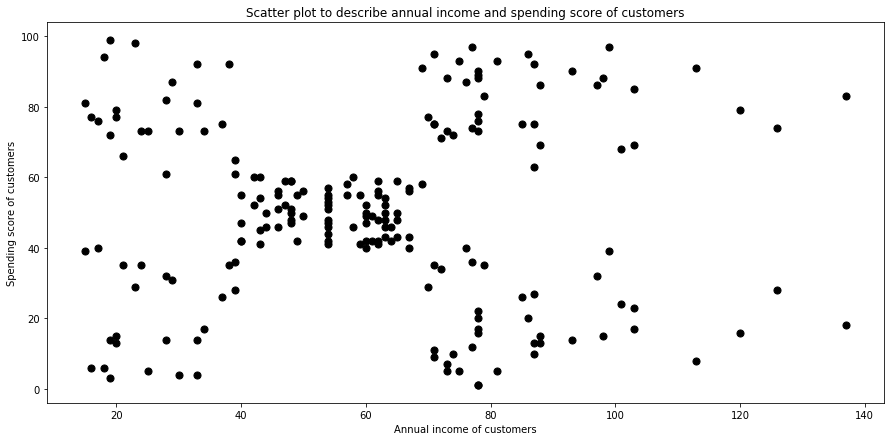

In [10]:
#Scatter plot
plt.scatter(DATA[:, 0], DATA[:, 1], s = 50, c = 'black')
plt.xlabel('Annual income of customers')
plt.ylabel('Spending score of customers')
plt.title('Scatter plot to describe annual income and spending score of customers')
plt.show()

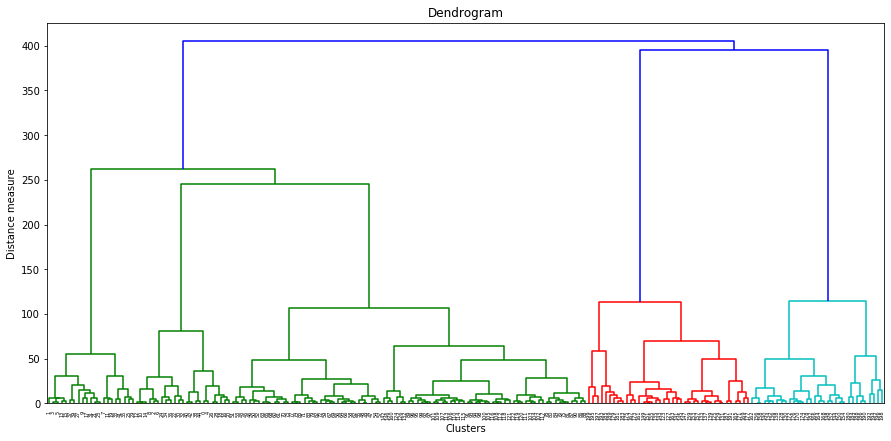

In [11]:
# Dendrogram to find the optimal number of clusters
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(DATA, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Clusters')
plt.ylabel('Distance measure')
plt.show()

# DENDROGRAM
The results of both agglomerative and divisive clustering can be represented in the 
form of two dimensional diagram and is known as DENDROGRAM.

# Linkage methods:
Linkage methods describes the way in which grouping of observatios is taking place.
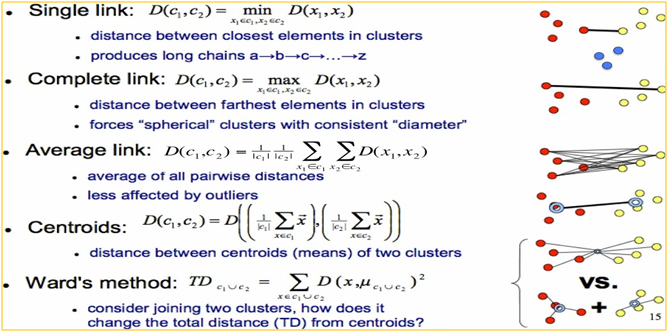

In [12]:
# Fitting Hierarchical Clustering to the dataset
from sklearn.cluster import AgglomerativeClustering
hc=AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'ward')
y_hc=hc.fit_predict(DATA)

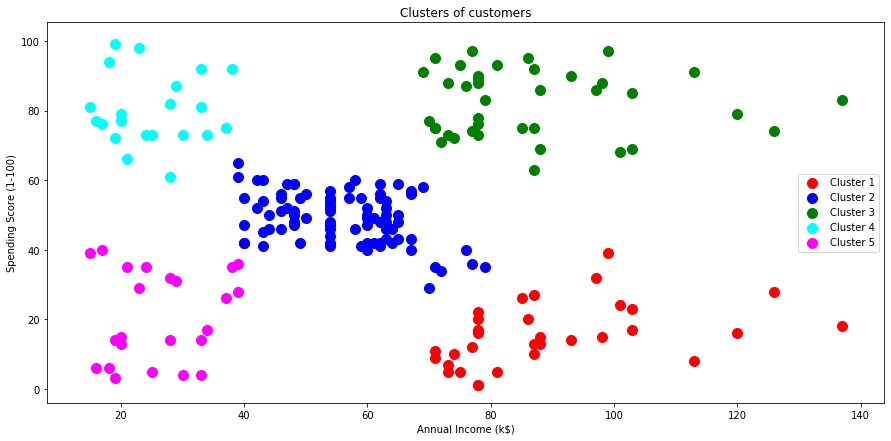

In [13]:
# Visualising the clusters
plt.scatter(DATA[y_hc == 0, 0], DATA[y_hc == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(DATA[y_hc == 1, 0], DATA[y_hc == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(DATA[y_hc == 2, 0], DATA[y_hc == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(DATA[y_hc == 3, 0], DATA[y_hc == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(DATA[y_hc == 4, 0], DATA[y_hc == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

# K-Means clustering:
Mac Queen suggested that the K-Means algorithm which assigns each observation 
to the cluster having nearest centroide(mean).

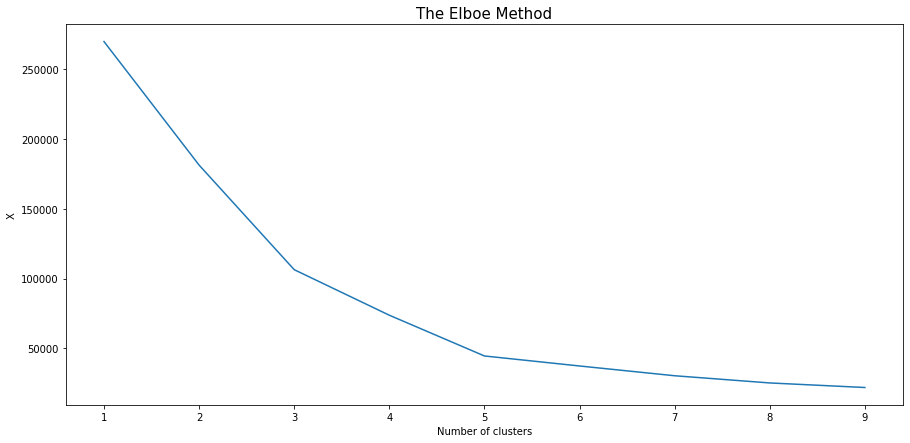

In [14]:
#Selecting optimum number of clusters using elbow method
from sklearn.cluster import KMeans
X=[]
for i in range(1, 10):
    kmeans=KMeans(n_clusters=i, max_iter=200, n_init=10, random_state=0)
    kmeans.fit(DATA)
    X.append(kmeans.inertia_)
plt.plot(range(1, 10), X)
plt.title('The Elboe Method', fontsize=15)
plt.xlabel('Number of clusters')
plt.ylabel('X')
plt.show()

In [15]:
Kmeans=KMeans(n_clusters=5, max_iter=200, n_init=10, random_state=0)
Kmeans.fit(DATA)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=200,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

In [16]:
data['Clusters']=Kmeans.labels_
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Clusters
0,1,Male,19,15,39,4
1,2,Male,21,15,81,3
2,3,Female,20,16,6,4
3,4,Female,23,16,77,3
4,5,Female,31,17,40,4


In [17]:
data['Clusters'].value_counts()

1    81
2    39
0    35
4    23
3    22
Name: Clusters, dtype: int64

In [18]:
Kmeans.cluster_centers_

array([[88.2       , 17.11428571],
       [55.2962963 , 49.51851852],
       [86.53846154, 82.12820513],
       [25.72727273, 79.36363636],
       [26.30434783, 20.91304348]])

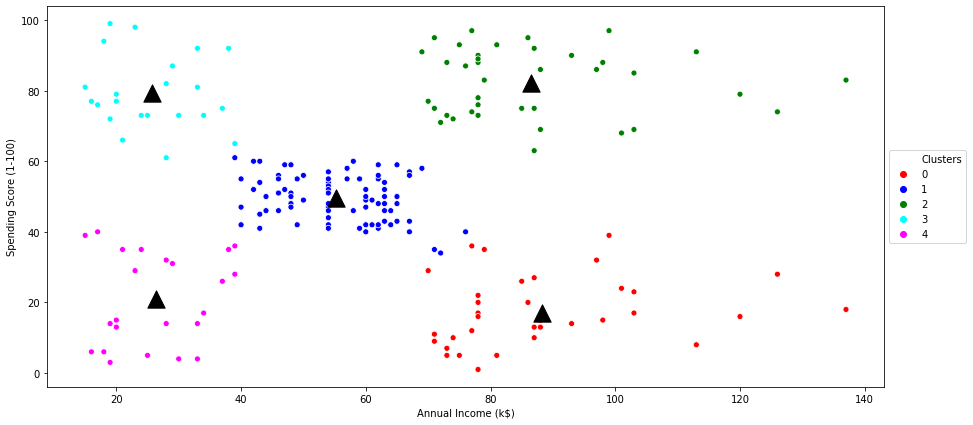

In [19]:
graph=sns.scatterplot(x="Annual Income (k$)", y="Spending Score (1-100)", hue='Clusters', data=data, palette=['red', 'blue', 'green', 'cyan', 'magenta'])
graph.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)
plt.scatter(Kmeans.cluster_centers_[:, 0], Kmeans.cluster_centers_[:, 1], s=300, c='black', label='Centroid', marker="^")

From both the graph of Hierarchical Clustering and K-means clustering we can clearely observe that the data is divided into 5 clusters.
First cluster indicates that customers having high income spends less.
Second cluster indicates that customes having medium income spends according to their budget.
Third cluster indicates that customers having high income spenda more.
Fourth cluster indicates that customers having low income spends more.
Fifth cluster indicates that customers having low income spends less. 
And we can observa that second cluster is having more observations, so we can say that in our data we have more customers from having annual income between 40k to 80k spends in between 40 to 60 (spending score(1-100)). So based on this customer segmentation analysis, one could formulate their marketing strategies in order to sell their products to the target customers. For example customers from blue and green clusters spends more, hence salesman should target them more.